In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visualization as vis
import simulation as sim
import regresors as reg
import evolutionary as ev
import variables as vars

# Data

In [2]:
data = sim.gen_data()

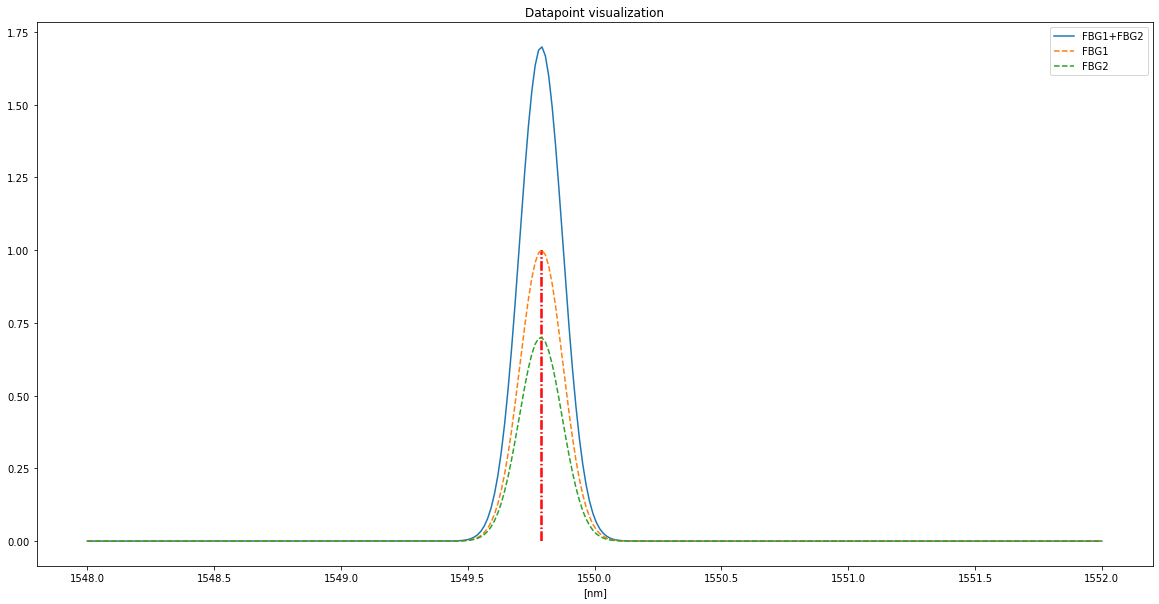

In [3]:
sim.plot_datapoint(*data)

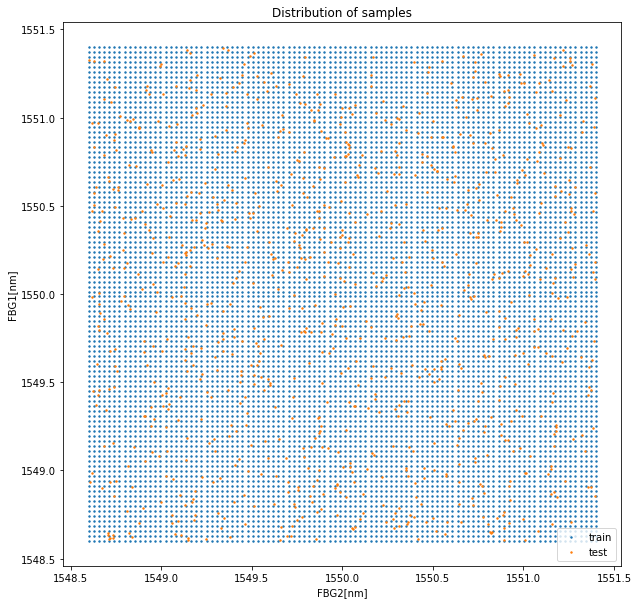

In [4]:
sim.plot_dist(*data)

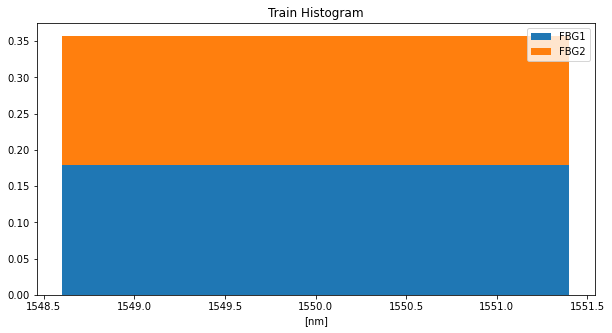

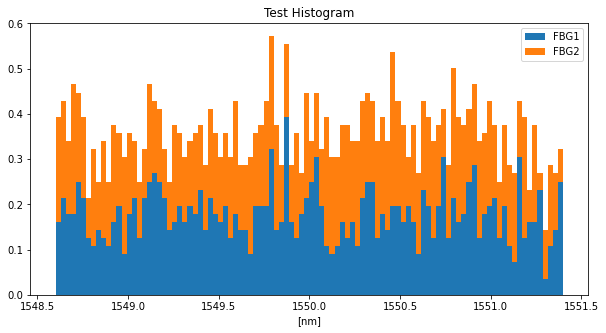

In [5]:
sim.plot_freq_dist(*data)

In [3]:
# normalize
X_train, y_train, X_test, y_test = sim.normalize(*data)

# Regresors

## ELM

hidden_size error minimo: 5795


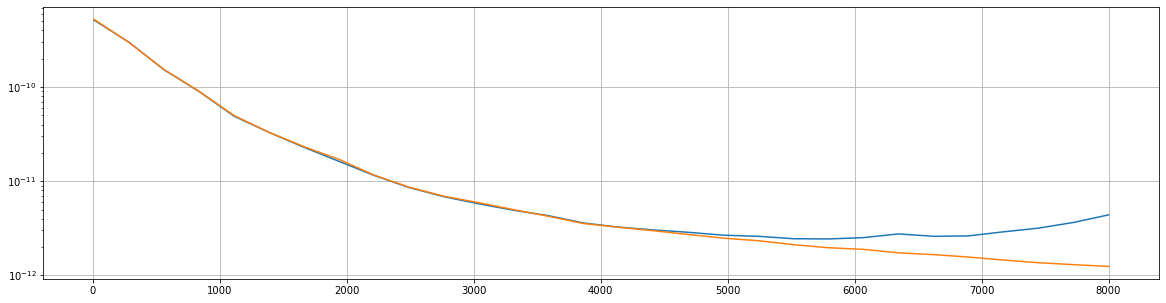

In [8]:
# let's do some hyperparameter search

hidden_size_N = 30
hidden_size_array = np.linspace(10, 8000, hidden_size_N, dtype=np.int)
error = np.ones([hidden_size_N, 2])
hidden_size = 0
error_min = 1
for i in range(hidden_size_N):
  model = reg.ELM(X_train.shape[1], hidden_size_array[i])
  output_weights = model.fit(X_train, y_train)
  error_train = sim.D*np.mean(np.abs(y_train - model.predict(X_train)))
  error_test = sim.D*np.mean(np.abs(y_test - model.predict(X_test)))
  error[i] = [error_test, error_train]
  if error_test < error_min:
    error_min = error_test
    hidden_size = hidden_size_array[i]
    
print("hidden_size error minimo: %d" % hidden_size)

plt.figure(figsize=(20,5))
plt.plot(hidden_size_array[:,None], error);
plt.yscale("log");
plt.grid()

In [7]:
model = reg.ELM(X_train.shape[1], 5795)
model.fit(X_train, y_train)

mean(Absolute Error [pm]) = 2.3257967971482723


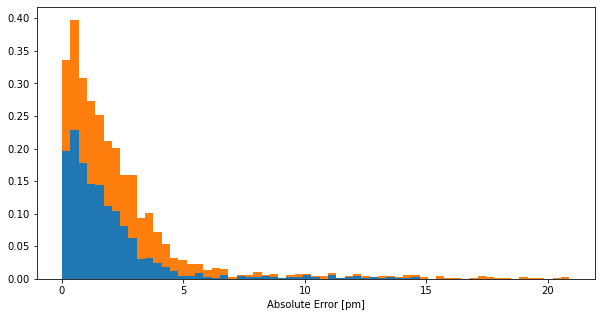

In [8]:
AE = sim.D*np.abs(y_test-model.predict(X_test))
vis.plot_dist(AE/ vars.p, "Absolute Error [pm]", mean=True)

mean(Absolute Error [pm]) = 3.3418681438975684


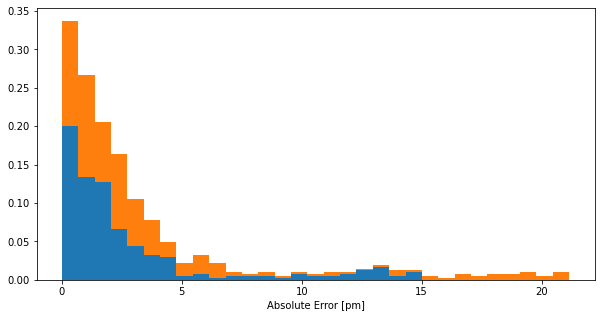

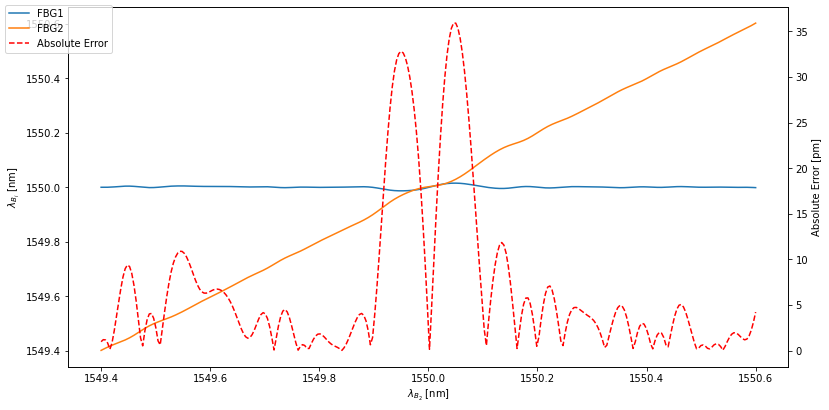

In [9]:
# Behaviour on sweep of one FBG
vis.plot_sweep(model)

## Least Squares Support Vector Regression

In [12]:
gamma_N = 20
gamma_array = np.linspace(1e-1, 0.5, gamma_N)
C_N = 20
C_array= np.logspace(0, 5, C_N)

error = np.ones([gamma_N, C_N, 2])
gamma = 0 
C=100 #regularization
error_min = 1
for i in range(gamma_N):
  for j in range(C_N):
    print("gamma: "+str(gamma_array[i])+" C: "+str(C_array[j]))
    model = reg.LSSVR(C=C_array[j], kernel='rbf', gamma=gamma_array[i])
    model.fit(X_train, y_train)
    error_train = sim.D*np.mean(np.abs(y_train - model.predict(X_train)))
    error_test = sim.D*np.mean(np.abs(y_test - model.predict(X_test)))
    error[i,j] = [error_test, error_train]
    if error_test < error_min:
      error_min = error_test
      gamma = gamma_array[i]
      C = C_array[i]
      
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Test")
plt.imshow(1/error[...,0], origin='lower')
plt.colorbar()
plt.subplot(2,2,2)
plt.title("Train")
plt.imshow(1/error[...,1], origin='lower')
plt.colorbar()

gamma: 0.1 C: 1.0
gamma: 0.1 C: 1.8329807108324359
gamma: 0.1 C: 3.3598182862837818
gamma: 0.1 C: 6.158482110660264
gamma: 0.1 C: 11.28837891684689
gamma: 0.1 C: 20.69138081114789
gamma: 0.1 C: 37.926901907322495
gamma: 0.1 C: 69.51927961775606
gamma: 0.1 C: 127.42749857031335
gamma: 0.1 C: 233.57214690901213
gamma: 0.1 C: 428.1332398719391
gamma: 0.1 C: 784.7599703514607
gamma: 0.1 C: 1438.449888287663
gamma: 0.1 C: 2636.650898730358
gamma: 0.1 C: 4832.930238571752
gamma: 0.1 C: 8858.667904100823
gamma: 0.1 C: 16237.76739188721
gamma: 0.1 C: 29763.51441631319
gamma: 0.1 C: 54555.947811685146
gamma: 0.1 C: 100000.0
gamma: 0.12105263157894737 C: 1.0
gamma: 0.12105263157894737 C: 1.8329807108324359
gamma: 0.12105263157894737 C: 3.3598182862837818
gamma: 0.12105263157894737 C: 6.158482110660264
gamma: 0.12105263157894737 C: 11.28837891684689
gamma: 0.12105263157894737 C: 20.69138081114789
gamma: 0.12105263157894737 C: 37.926901907322495
gamma: 0.12105263157894737 C: 69.51927961775606
gamm

## Gaussian Regression

In [8]:
theta=1
beta=1.788889
alpha=1e-5 #regularization

kernel = theta*reg.RBF(beta)

#alpha es el sigma (relacionado a la cantidad de ruido)
model = reg.GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)

model.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-05, kernel=1**2 * RBF(length_scale=1.79),
                         random_state=0)

mean(Absolute Error [pm]) = 1.770036398430003


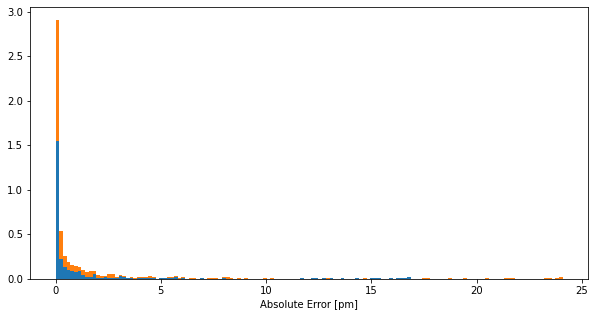

In [9]:
AE = sim.D*np.abs(y_test-model.predict(X_test))
vis.plot_dist(AE/ vars.p, "Absolute Error [pm]", mean=True)

mean(Absolute Error [pm]) = 4.572248497182695


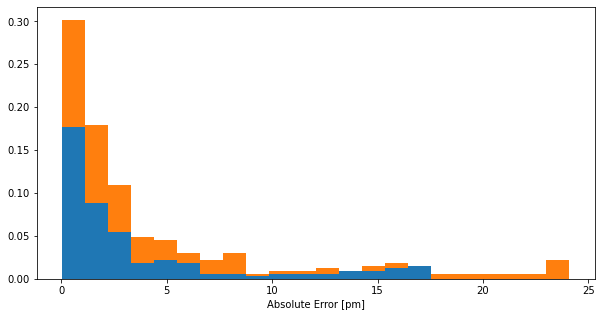

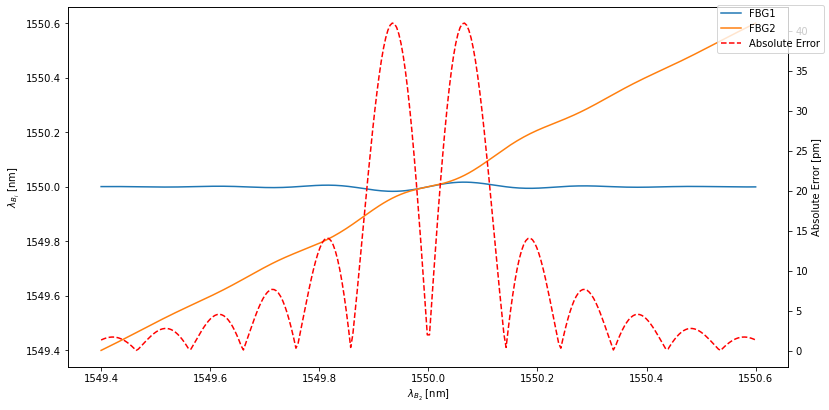

In [10]:
# Behaviour on sweep of one FBG
vis.plot_sweep(model)

# Evolutionary Algorithms

## Genetic Algorithm

In [34]:
y = np.array([1549.5*vars.n, 1550.5*vars.n])
x = np.sum(sim.R(vars.A[:, None], y[None, :], vars.I[None, :], vars.dA[None, :]) ,axis=-1)

model = ev.genetic_algorithm(max_generation=50, pop_size=150)
y_hat = model.predict(x)
print("y_hat = "+str(y_hat))
print(np.mean(np.abs(y_hat-y)))


y_hat = [1.54950001e-06 1.55050006e-06]
3.1790191537352567e-14


mean(Absolute Error [pm]) = 0.6626023806991573


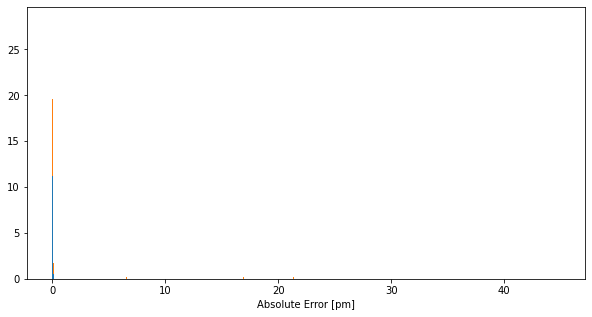

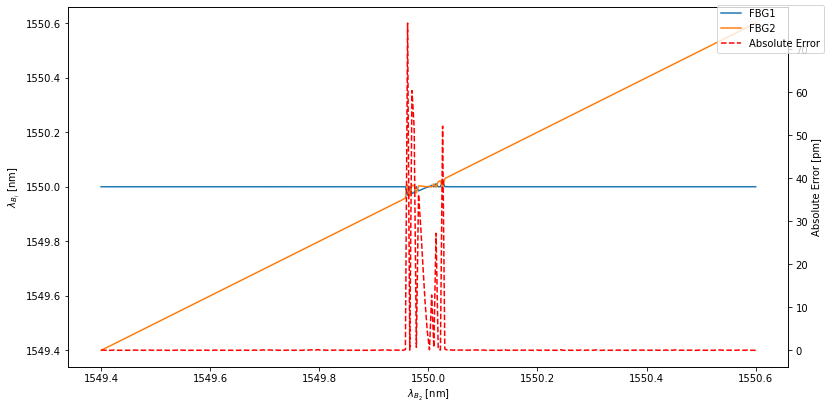

In [18]:
# Behaviour on sweep of one FBG
vis.plot_sweep(model, normalize = False)

mean(Absolute Error [pm]) = 4.031310489858798


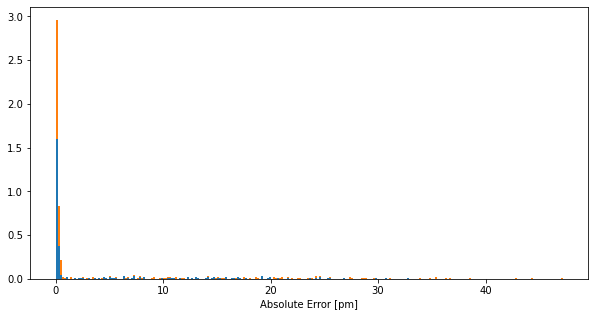

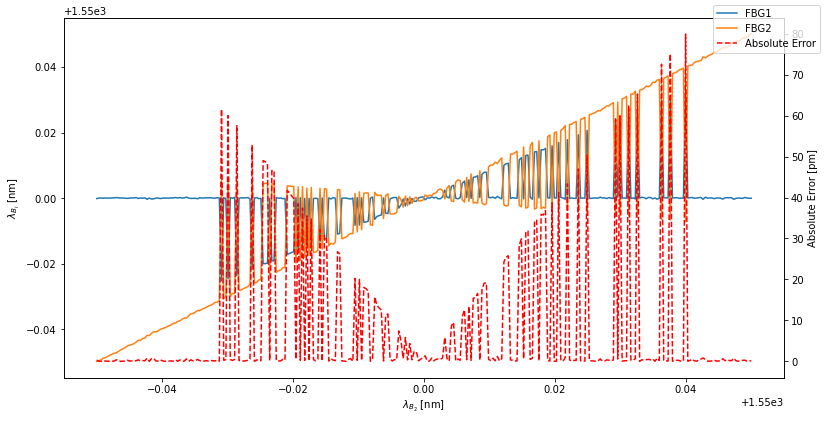

In [35]:
# Behaviour on sweep of one FBG
vis.plot_sweep(model, normalize = False, d=0.05*vars.n)

## Swap Differential Evolution

In [8]:
y = np.array([1549.5*vars.n, 1550.5*vars.n])
x = np.sum(sim.R(vars.A[:, None], y[None, :], vars.I[None, :], vars.dA[None, :]) ,axis=-1)

model = ev.swap_differential_evolution(max_generation=100, pop_size=100, F=0.1)
y_hat = model.predict(x, verbose=True)
y_hat

0 [1.55198687e-06 1.55195936e-06] 44.363107405277084
0 [1.55164814e-06 1.55000838e-06] 38.57243285965059
0 [1.55178320e-06 1.55056395e-06] 23.514350593833576
0 [1.54868611e-06 1.54836234e-06] 41.028948973427696
0 [1.54966368e-06 1.55131427e-06] 30.153340475750817
0 [1.54930508e-06 1.54994084e-06] 32.59113049124713
0 [1.54877365e-06 1.54888876e-06] 53.01439908814207
0 [1.54869217e-06 1.54847975e-06] 46.12809273487518
0 [1.55142338e-06 1.55177951e-06] 40.238742140572406
0 [1.54940828e-06 1.54805822e-06] 20.28686662475198
0 [1.54927337e-06 1.54965546e-06] 25.003646354718775
0 [1.54989219e-06 1.55151597e-06] 38.93106550089064
0 [1.54860776e-06 1.55054513e-06] 23.016450173329968
0 [1.54996007e-06 1.55088587e-06] 37.32615140322133
0 [1.55172912e-06 1.54926572e-06] 33.29693900407608
0 [1.54959209e-06 1.54965412e-06] 28.180271612409104
0 [1.55059635e-06 1.54865851e-06] 23.839116268205508
0 [1.55154958e-06 1.54963420e-06] 26.421447028009002
0 [1.55142342e-06 1.54915716e-06] 37.5356177144872
0 [

array([1.5495e-06, 1.5505e-06])

MemoryError: Unable to allocate 230. GiB for an array with shape (30901486660,) and data type float64

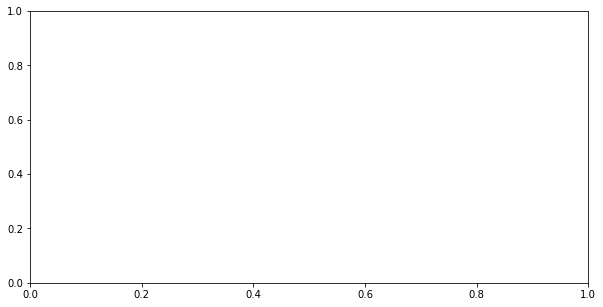

In [12]:
vis.plot_sweep(model, normalize = False)

In [ ]:
vis.plot_sweep(model, normalize = False, d=0.05*vars.n)

mean(Absolute Error [pm]) = 0.004028007782538946


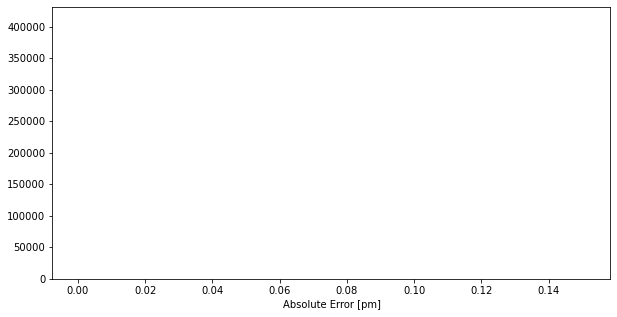

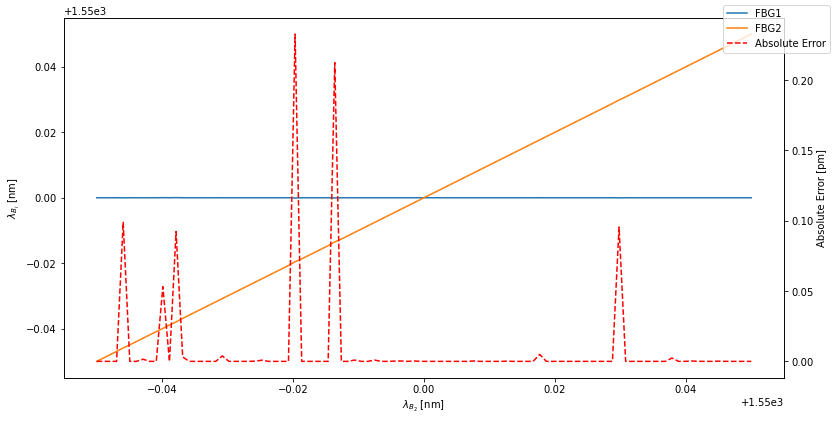

In [11]:
vis.plot_sweep(model, normalize = False, d=0.05*vars.n, N=100)                                                           